In [1]:
# Dependencies

import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
import numpy as np

In [2]:
# Read the CSV files and save them into variables

mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Merge the 2 tables into 1

total_results = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

total_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Check number of different mice

len(total_results['Mouse ID'].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

total_results.loc[total_results.duplicated(subset=['Mouse ID','Timepoint']), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

duplicated_mouse = total_results[total_results['Mouse ID'] == 'g989'].index
total_results.drop(duplicated_mouse, inplace=True)

total_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.

len(total_results['Mouse ID'].unique())

248

Summary Statistics

In [8]:
# Group the DataFrame by Drug Regimen

group_results = total_results.groupby('Drug Regimen')

# Find mean, median, variance, standard deviation,and SEM of tumor volume for each

mean = group_results['Tumor Volume (mm3)'].mean()
median = group_results['Tumor Volume (mm3)'].median()
variance = group_results['Tumor Volume (mm3)'].var()
std_dev = group_results['Tumor Volume (mm3)'].std()
sem = group_results['Tumor Volume (mm3)'].sem()

# Create a Summary Statistics DataFrame

summary_stats = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                              "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": std_dev,
                              "Tumor Volume Std. Err": sem})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Use the grouped DF and the agg function to find stats, then rename columns

summ_stats = group_results.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summ_stats.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume',
                           'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.',
                           'sem': 'Tumor Volume Std. Err'})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

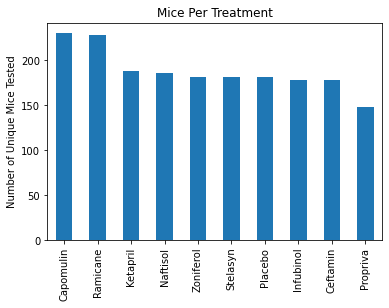

In [10]:
# Start by grouping our DF by drug regimens & counting the mice in each 

drug_regimen = total_results['Drug Regimen'].value_counts()

#Bar Plot

drug_regimen.plot(kind="bar");
plt.ylabel('Number of Unique Mice Tested');
plt.title('Mice Per Treatment');

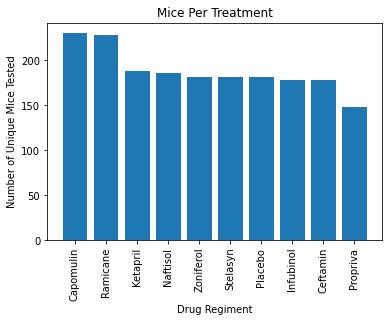

In [11]:
# Create variables to hold our lists needed

drugs = drug_regimen.index.to_list()
mice = total_results['Drug Regimen'].value_counts()
tick_locations = [values for values in drugs]

# Bar Plot

plt.bar(drugs, mice)
plt.xticks(tick_locations, drugs, rotation=90)
plt.title('Mice Per Treatment')
plt.xlabel('Drug Regiment')
plt.ylabel('Number of Unique Mice Tested')
plt.show()

In [12]:
# Group of DF by gender & find each gender's count

genders = total_results.groupby('Sex').count()

# Set variables to use in pie chart

labels = genders.index.to_list()
sizes = genders['Mouse ID'].to_list()
colors = ['orange', 'blue']

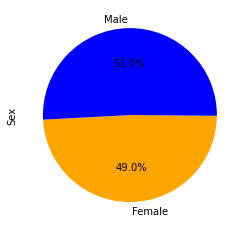

In [13]:
#Pie Chart

genders.plot(kind='pie', y='Mouse ID', colors=colors, autopct='%1.1f%%', startangle=183, legend=None)
plt.ylabel('Sex')
plt.show()

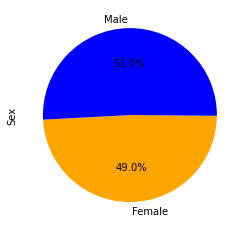

In [14]:
#Pie Chart

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=183)
plt.ylabel('Sex')
plt.show()

Quartiles, Outliers and Boxplots

In [15]:
# Find the last (greatest) timepoint for each mouse

last_timepoint = total_results.groupby(["Mouse ID"])['Timepoint'].max()
last_timepoint.reset_index(drop=True)
last_timepoint.head

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint for each mouse

final_tumor_volume_df = pd.merge(last_timepoint, total_results, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Treatments we are searching for & an empty list for our tumor volumes

regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = []
 
# For loop to grab tumor volumes for mice on each drug & find our boundaries for possible outliers

for drug in regimens:
    final_tumor_volume = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_volume.append(final_tumor_volume)
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{drug}'s possible outliers: {outliers}")

Capomulin's possible outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's possible outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's possible outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's possible outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


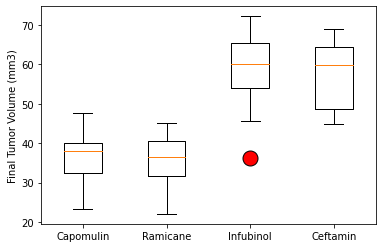

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outlier = dict(markerfacecolor='r', markersize=15, markeredgecolor='black')
plt.boxplot(tumor_volume, labels = regimens, flierprops=outlier)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

Line and Scatter Plots

In [34]:
# Create a DF of just mice that got the Capomulin drug to use

capomulin_df = total_results[total_results['Drug Regimen'] == 'Capomulin']
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


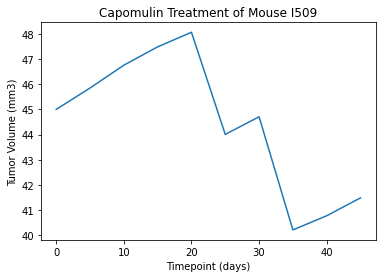

In [35]:
# Pick a mouse in the Capomulin DF

capomulin_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509']
capomulin_mouse

# Line Graph of time point versus tumor volume for a mouse treated with Capomulin

x = capomulin_mouse['Timepoint'];
y = capomulin_mouse['Tumor Volume (mm3)'];
plt.plot(x, y)
plt.title('Capomulin Treatment of Mouse I509');
plt.xlabel('Timepoint (days)');
plt.ylabel('Tumor Volume (mm3)');

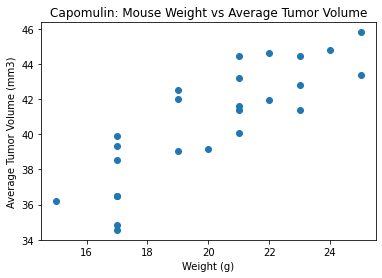

In [36]:
# Group Capomulin DF by averages & create a scatter plot of mouse weight versus average tumor volume

capomulin_average = capomulin_df.groupby('Mouse ID').mean()
y_axis = capomulin_average['Tumor Volume (mm3)']
x_axis = capomulin_average['Weight (g)']
plt.scatter (x_axis, y_axis);
plt.title('Capomulin: Mouse Weight vs Average Tumor Volume');
plt.xlabel('Weight (g)');
plt.ylabel('Average Tumor Volume (mm3)');

Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


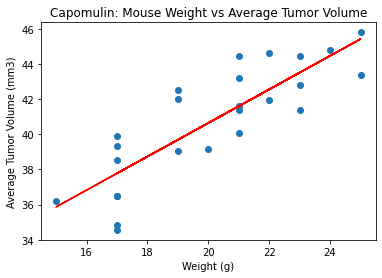

In [37]:
# Define our correlation coefficient

capomulin_correlation = sts.pearsonr(x_axis, y_axis)
cap_corr = round(capomulin_correlation[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {cap_corr}")


# Define our linear regression model

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

# Plot linear regression line over our previous scatter plot

plt.scatter (x_axis, y_axis);
plt.plot(x_axis, regress_values, "r-")
plt.title('Capomulin: Mouse Weight vs Average Tumor Volume');
plt.xlabel('Weight (g)');
plt.ylabel('Average Tumor Volume (mm3)');